# Interior


## Common script

In [1]:
from fdray import *


def render(finish1, finish2, finish3):
    floor = Pigment(
        "cells",
        ColorMap(
            (0, Color((0.7, 0.6, 0.4))),
            (0.4, Color((0.5, 0.8, 0.5))),
            (1, Color((1, 1, 1))),
        ),
    ).scale(0.3)
    sky = Pigment("wrinkles", ColorMap((0.3, "SkyBlue"), (0.9, "White")))
    sphere = Sphere((0, 0, 0), 0.4, Color((0.9, 0.9, 0.9), filter=1))
    return Scene(
        Include("colors.inc"),
        GlobalSettings(assumed_gamma=2.2),
        Camera(0, -2, view_scale=1.2, distance=3),
        LightSource((1.5, 25, 5), "white"),
        Plane((0, 0, 1), -0.5, floor),
        SkySphere(sky.scale(1, 0.2, 0.2)),
        sphere.translate(0, -1, 0).add(finish1),
        sphere.add(finish2),
        sphere.translate(0, 1, 0).add(finish3),
    ).render(600, 300)

## ior (index of refraction)

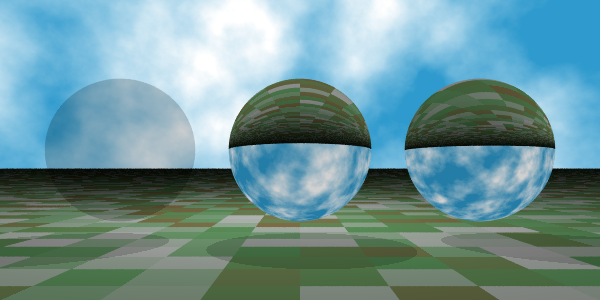

In [2]:
render(
    Interior(ior=1),  # air
    Interior(ior=1.33),  # water
    Interior(ior=1.51),  # glass
)

## caustics

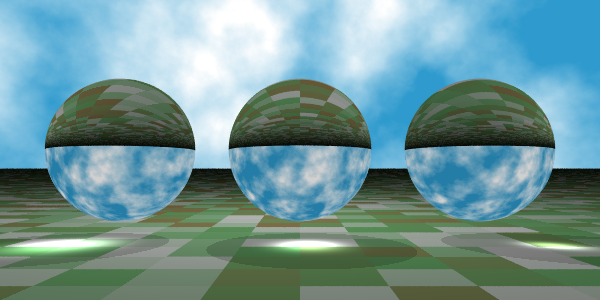

In [3]:
render(
    Interior(ior=1.51, caustics=0.2),
    Interior(ior=1.51, caustics=0.4),
    Interior(ior=1.51, caustics=0.8),
)

## fade_distance

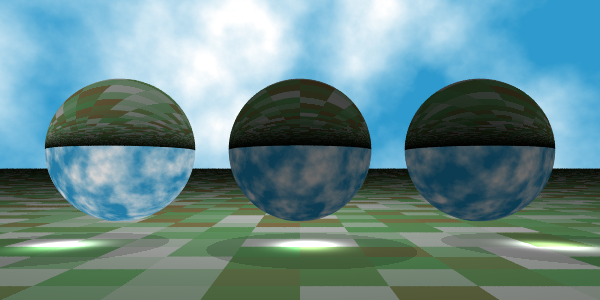

In [4]:
render(
    Interior(ior=1.51, caustics=0.4, fade_distance=0),
    Interior(ior=1.51, caustics=0.4, fade_distance=0.5),
    Interior(ior=1.51, caustics=0.4, fade_distance=1),
)

## Material

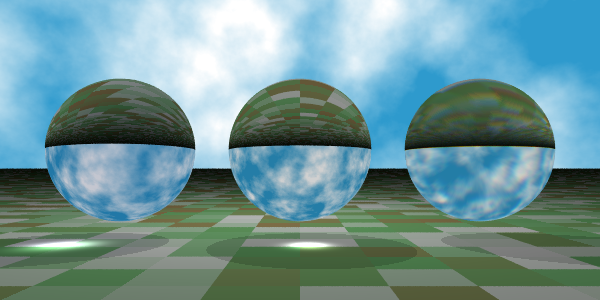

In [16]:
render(
    Interior(
        ior=1.33,
        caustics=0.5,
        fade_distance=10,
        fade_power=1,
        fade_color=(0.1, 0.3, 1.0),
    ),
    Interior(ior=1.51, caustics=1),
    Interior(ior=1.6, dispersion=1.2, dispersion_samples=10),
)